In [32]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [36]:
# class for Neural Network
class Net(nn.Module): # we call the class NET for Network
    def __init__(self,D_in,H,D_out): 
        # D_in is the size of input
        # H is the number of Neurons
        # D_out is the size of output layer
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H) # Hidden Layer
        self.linear2=nn.Linear(H, D_out) # Output Layer
    def forward(self,x):# Forward Method
        x = sigmoid(self.linear1(x)) # this is for hidden layer
        x = sigmoid(self.linear2(x)) # this is for output layer
        return x

Then we have to train this model 

In [46]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
    return cost

`Cross entropy loss function `

In [57]:
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

`Now its the time to create a dataset, optimizer, and loss function`

In [58]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0
criterion = criterion_cross
model = Net(D_in=1,H=2,D_out=1)
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

In [59]:
cost  = train(Y,X, model,optimizer,criterion,epochs=1000)

`prediction part`

In [60]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9979], grad_fn=<SigmoidBackward0>)

In [62]:
X_=torch.tensor([[0.0],[2.0],[7.0]])
Yhat=model(X_)
Yhat

tensor([[0.9979],
        [0.9974],
        [0.0016]], grad_fn=<SigmoidBackward0>)

### Now we want to` add more neuron` to our hidden layer

In [131]:
# import necessary moduls
import torch
import torch.nn as nn
from torch import sigmoid
from torch.utils.data import Dataset,DataLoader

In [132]:
# class of statset
class Data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20,20,100).view(-1,1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10) & (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]> 5) & (self.x[:,0]< 10)]=1
        self.y = self.y.view(-1,1)
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [152]:
def train(data_set, model, criterion,train_loader,optimizer,epochs):
    cost = []
    for epoch in range(epochs):
        total=0
        for x,y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
    return cost

In [160]:
torch.manual_seed(0)
data_set =Data()
train_loader = DataLoader(dataset=data_set,batch_size=100)
criterion = nn.BCELoss()
model_m = torch.nn.Sequential(
    torch.nn.Linear(1, 9), 
    torch.nn.Sigmoid(),
    torch.nn.Linear(9,1),
    torch.nn.Sigmoid())
optimizer = torch.optim.Adam(model_m.parameters(),lr = 0.1)

In [161]:
cost = train(data_set,model_m,criterion,train_loader,optimizer,epochs=600)

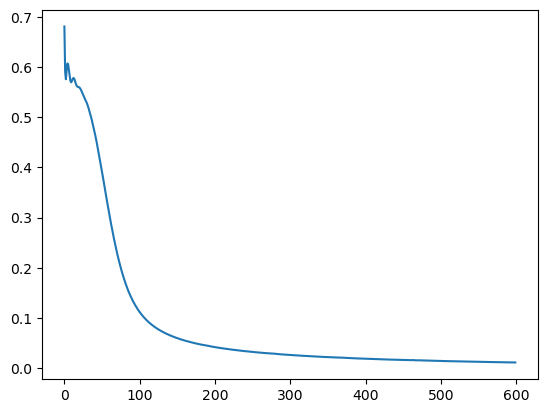

In [162]:
plt.plot(cost)

In [164]:
# we have to bear in mindthat by increasing the number of hiddenn layers we will achieve the best result
X=torch.tensor([[0.0],[11.0],[7.0]])
Yhat=model_m(X)
Yhat

tensor([[3.7013e-04],
        [3.8348e-03],
        [9.9939e-01]], grad_fn=<SigmoidBackward0>)

### `Now we want to evaluate how we can work with multiple input`

In [193]:
# we need to input essentioal libraries
import torch
import torch.nn as nn
from torch import sigmoid
from torch.utils.data import Dataset, DataLoader

In [194]:
# Make dataset

class XOR_Data(Dataset):

    # Constructor
    def __init__(self,N_s=100):
        self.x = torch.zeros((N_s,2))
        self.y = torch.zeros((N_s,1))
        for i in range(N_s//4):

            self.x[i,:] = torch.Tensor([0.0,0.0])
            self.y[i,0] = torch.Tensor([0.0])

            self.x[i+N_s//4,:] = torch.Tensor([0.0,1.0])
            self.y[i+N_s//4,0] = torch.Tensor([1.0])

            self.x[i+N_s//2,:] = torch.Tensor([1.0,0.0])
            self.y[i+N_s//2,0] = torch.Tensor([1.0])

            self.x[i+3*N_s//4,:] = torch.Tensor([1.0,1.0])
            self.y[i+3*N_s//4,0] = torch.Tensor([0.0])

            self.x = self.x +0.01*torch.randn((N_s,2))
        
        self.len = N_s

    # Getetr
    def __getitem__(self, index):
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len


In [195]:
def train(data_set, model, criterion,train_loader,optimizer,epochs=5):
    cost = []
    #acc =[]
    for epoch in range(epochs):
        total=0
        for x,y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item() 
        #acc.append(nn.accuracy(model,data_set))
        cost.append(total)
    return cost

In [196]:
criterion = nn.BCELoss()
data_set = XOR_Data()
train_loader = DataLoader(dataset=data_set,batch_size=1)
model = torch.nn.Sequential(torch.nn.Linear(2, 9), torch.nn.Sigmoid(),torch.nn.Linear(9,1),torch.nn.Sigmoid())
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [197]:
cost =train(data_set, model, criterion,train_loader,optimizer,epochs=500)

`prediction`

In [210]:
X=torch.tensor([[10.0,40.0],[20.0,20.0],[99.0,86.0]])
Yhat=model(X)
Yhat

tensor([[0.8577],
        [0.0031],
        [0.0031]], grad_fn=<SigmoidBackward0>)

### `Now its time to work with Multi_class Neural Network`

In [211]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

In [213]:
# Define a function to plot accuracy and loss
def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.show()

In [219]:
# Define a Neural Network class
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x) # this is the difference when we use multi-class form
        return x

In [222]:
# Create the model with 100 neurons
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10
model = Net(input_dim, hidden_dim, output_dim)

In [218]:
# Dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [221]:
# Create data loader for both train dataset and valdiate dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [223]:
# Set the learning rate and the optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [224]:
# Create criterion function
criterion = nn.CrossEntropyLoss()

In [225]:
# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [226]:
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

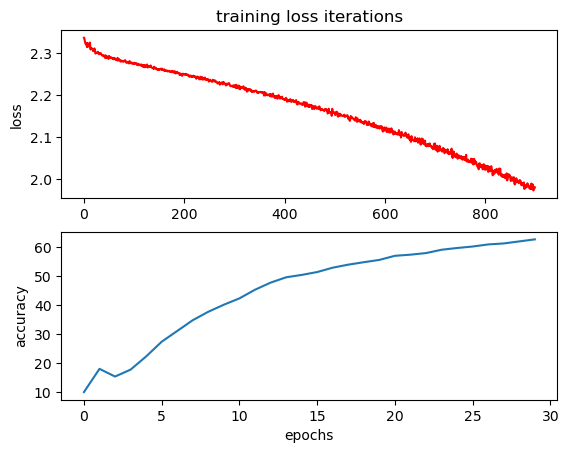

In [227]:
plot_accuracy_loss(training_results)

### `Now its the time to evaluate different forms of the activation in comapare with each other (Sigmoid, RelU, Tanh)`

In [228]:
# Import the libraries we need
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [229]:
# Build the model with sigmoid function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

In [230]:
# Build the model with Tanh function

class NetTanh(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

In [231]:
# Build the model with Relu function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [232]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

In [234]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [236]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [237]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

In [238]:
# Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [239]:
# Train a model with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [240]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [241]:
# Train a model with Relu function

modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=30)

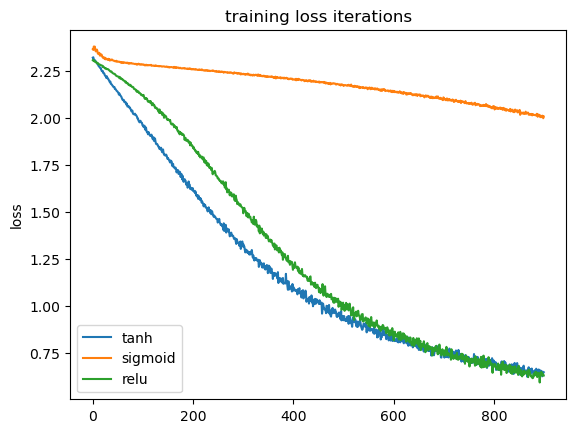

In [242]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

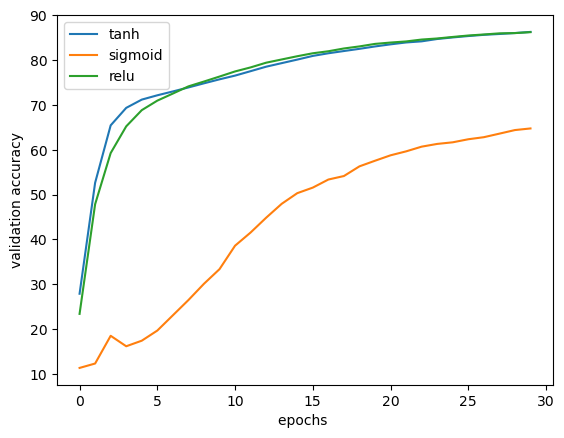

In [243]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()